<a href="https://colab.research.google.com/github/Alexcon19/Modelo-IA-Selecci-n-Fibra/blob/main/Actividad%20DCA%201%20-%20Alexander%20Leyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2023**
## **TEMA 1: Diseños completamente aleatorizados DCA**
### **1.1 Librerias básicas**


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats


### **Actividad DCA 1 - Alexander Leyton**
+ Una compañía compra materia prima a tres proveedores. La pureza de esta materia prima es un importante en la calidad del producto terminado.
+El departamento de calidad quiere determinar si existen diferencias en la pureza de la materia prima debido al proveedor.
+Se selecciona al azar 4 muestras de materia prima de cada proveedor de la última compra realizada en el mes, los resultados fueron los siguientes:


| Proveedor A | Proveedor B | Proveedor C |
|:-----------:|:-----------:|:-----------:|
|      94     |      88     |      95     |
|      95     |      92     |      96     |
|      93     |      86     |      96     |
|      96     |      87     |      92     |



# **a. Los niveles del Factor como listas: Ingresamos los datos como filas**

In [1]:
# **a. Los niveles del Factor como listas**
Proveedor_A = [94, 95, 93, 96]
Proveedor_B = [88, 92, 86, 87]
Proveedor_C = [95, 96, 96, 92]

# **b. Construimos el diccionario con los niveles del factor**

In [12]:
# **b. Construimos el diccionario con los niveles del factor**
dic_Proveedor = {'A':Proveedor_A, 'B':Proveedor_B, 'C':Proveedor_C}

# **c. Nuestro DataFrame**

In [13]:
# **c. Nuestro DataFrame**
Pureza = pd.DataFrame(dic_Proveedor)
Pureza

,A,B,C
0,94,88,95
1,95,92,96
2,93,86,96
3,96,87,92


# **d. Accediendo al atributo shape, el cual me muestra la cantidad de filas y columnas**

In [14]:
# **d. Accediendo al atributo shape, el cual me muestra la cantidad de filas y columnas**
Pureza.shape

(4, 3)

In [15]:
# igual resultad con accediendo al atributo index
Pureza.index

RangeIndex(start=0, stop=4, step=1)

# **e. Accediendo al atributo columns**

In [16]:
# **e. Accediendo al atributo columns**
Pureza.columns

Index(['A', 'B', 'C'], dtype='object')

# **f. accediendo al atributo tipo de datos de cada columna**

In [17]:
# **f. accediendo al atributo tipo de datos de cada columna**
Pureza.dtypes

A    int64
B    int64
C    int64
dtype: object

# **g. Análisis descriptivo de los datos del DataFrame**

In [18]:
# **g. Análisis descriptivo de los datos del DataFrame**
Pureza.describe()

,A,B,C
count,4.000000,4.000000,4.000000
mean,94.500000,88.250000,94.750000
std,1.290994,2.629956,1.892969
min,93.000000,86.000000,92.000000
25%,93.750000,86.750000,94.250000
50%,94.500000,87.500000,95.500000
75%,95.250000,89.000000,96.000000
max,96.000000,92.000000,96.000000


# **h. Haciendo el analisis boxplot**

<Axes: >

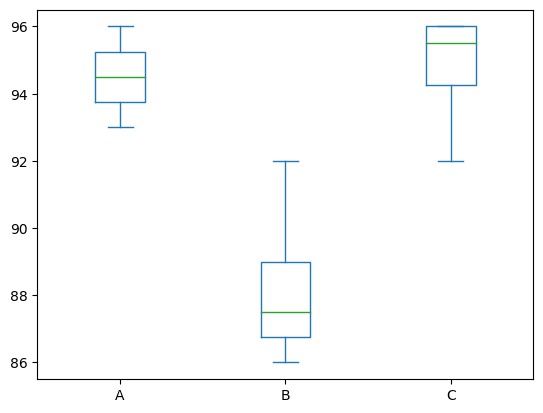

In [19]:
# **h. Haciendo el analisis descriptivo**
Pureza.plot.box()

In [20]:
# Número de observaciones por grupo
# ==============================================================================
Pureza.groupby('A').size()

A
93    1
94    1
95    1
96    1
dtype: int64

# **i. Reescribiendo el DataFrame**

In [27]:
# **i. Reescribiendo el DataFrame**
Proveedor = (['A']*4+['B']*4+['C']*4)
Proveedor

['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C']

In [28]:
Pureza_2 = [94, 95, 93, 96, 88, 92, 86, 87, 95, 96, 96, 92]

In [29]:
DCA  = pd.DataFrame({'Proveedor': Proveedor, 'Pureza_2': Pureza_2})
DCA

,Proveedor,Pureza_2
0,A,94
1,A,95
2,A,93
3,A,96
4,B,88
5,B,92
6,B,86
7,B,87
8,C,95
9,C,96


# **j. Analisis descriptivo de la variable**

In [30]:
# **j. Analisis descriptivo de la variable**
DCA.describe()

,Pureza_2
count,12.000000
mean,92.500000
std,3.630677
min,86.000000
25%,91.000000
50%,93.500000
75%,95.250000
max,96.000000


## **Precio Desgaste y desviación típica por Tipo_Cuero**

In [31]:
## **Precio Desgaste y desviación típica por Tipo_Cuero**
DCA.groupby('Proveedor')['Pureza_2'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Proveedor,,,,
A,94.50,1.290994,93,96
B,88.25,2.629956,86,92
C,94.75,1.892969,92,96


## **Cuartiles**

In [33]:
## **Cuartiles**
DCA.groupby('Proveedor')['Pureza_2'].quantile([.10, .25, .50, .75, .90])

Proveedor      
A          0.10    93.30
           0.25    93.75
           0.50    94.50
           0.75    95.25
           0.90    95.70
B          0.10    86.30
           0.25    86.75
           0.50    87.50
           0.75    89.00
           0.90    90.80
C          0.10    92.90
           0.25    94.25
           0.50    95.50
           0.75    96.00
           0.90    96.00
Name: Pureza_2, dtype: float64

# **k. BoxPlot para DCA**

<Axes: title={'center': 'Pureza_2 vs Proveedor'}, xlabel='Proveedor', ylabel='Pureza_2'>

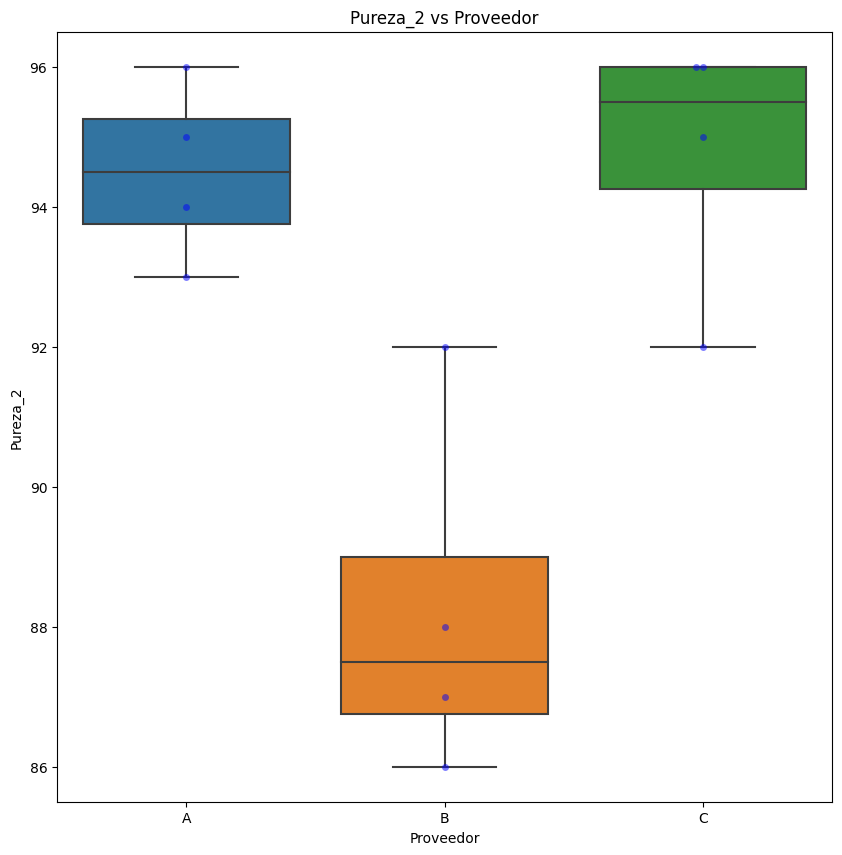

In [37]:
# **k. BoxPlot para DCA**
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Pureza_2 vs Proveedor')
sns.boxplot(x="Proveedor", y=Pureza_2,data=DCA,ax=ax)
sns.swarmplot(x="Proveedor", y="Pureza_2", data=DCA, color='blue', alpha=0.5, ax=ax)

# **l. Análisis de Varianza**

In [39]:
# **l. Análisis de Varianza**
modelDCA = ols("Pureza_2 ~ Proveedor", data = DCA).fit() #construimos el modelo
anova_result = sm.stats.anova_lm(modelDCA, typ=2)
print ('La Anova para el DCA es:')
print (anova_result)

La Anova para el DCA es:
           sum_sq   df          F    PR(>F)
Proveedor   108.5  2.0  13.376712  0.002014
Residual     36.5  9.0        NaN       NaN


In [40]:
anova_result.T #Imprimir la ANOVA en forma de tabla

,Proveedor,Residual
sum_sq,108.500000,36.5
df,2.000000,9.0
F,13.376712,NaN
PR(>F),0.002014,NaN


# **m. Análisis de Varianza2**

In [41]:
# **m. Análisis de Varianza2**
modeloDCA2 = smf.ols("Pureza_2 ~ C(Proveedor)", data = DCA).fit()
print(modeloDCA2.summary())


                            OLS Regression Results                            
Dep. Variable:               Pureza_2   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     13.38
Date:                Fri, 25 Aug 2023   Prob (F-statistic):            0.00201
Time:                        20:54:00   Log-Likelihood:                -23.702
No. Observations:                  12   AIC:                             53.40
Df Residuals:                       9   BIC:                             54.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            94.5000      1.00

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **n. Análisis de Varianza3**

In [43]:
# **n. Análisis de Varianza3** No sirve para nada
modeloDCA3 = smf.ols("Pureza_2 ~ C(Proveedor)-1", data = DCA).fit()
print(modeloDCA3.summary())

                            OLS Regression Results                            
Dep. Variable:               Pureza_2   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     13.38
Date:                Fri, 25 Aug 2023   Prob (F-statistic):            0.00201
Time:                        20:56:56   Log-Likelihood:                -23.702
No. Observations:                  12   AIC:                             53.40
Df Residuals:                       9   BIC:                             54.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(Proveedor)[A]    94.5000      1.007     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **o. Comparaciones Múltiples**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-6.25,0.0045,-10.2258,-2.2742,True
A,C,0.25,0.9832,-3.7258,4.2258,False
B,C,6.5,0.0035,2.5242,10.4758,True


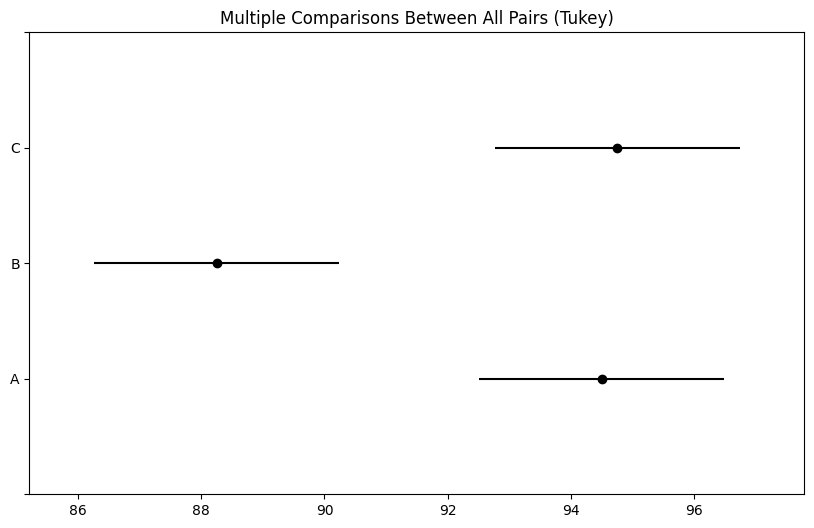

In [44]:
# **Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCA["Pureza_2"],     # Data
                          groups=DCA["Proveedor"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **p. Normalidad de los Residuos: Shapiro Wilks y Gráfico de Probabilidad para los residuos**

## **Prueba Analítica con Shapiro**

In [54]:
# **Forma 1. Shapiro Wilks**
w, p_value= stats.shapiro(modelDCA.resid)
print ('Cual es el estadistico de Prueba para shapiro wilks w =', w)
print ('El valor p para el estadistico de prueba es p_value =', p_value)
print ('Para que se cumpla el supuesto de normalidad se debe cumplir que p_value =', f'{p_value}>0.05')

Cual es el estadistico de Prueba para shapiro wilks w = 0.9716333150863647
El valor p para el estadistico de prueba es p_value = 0.927138090133667
Para que se cumpla el supuesto de normalidad se debe cumplir que p_value = 0.927138090133667>0.05


In [47]:
DCA['Pureza_2'].describe()

count    12.000000
mean     92.500000
std       3.630677
min      86.000000
25%      91.000000
50%      93.500000
75%      95.250000
max      96.000000
Name: Pureza_2, dtype: float64

## **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Todos los datos**

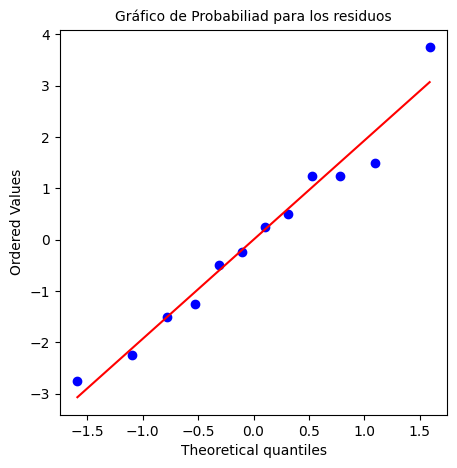

In [55]:
# **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modelDCA.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por secciones**

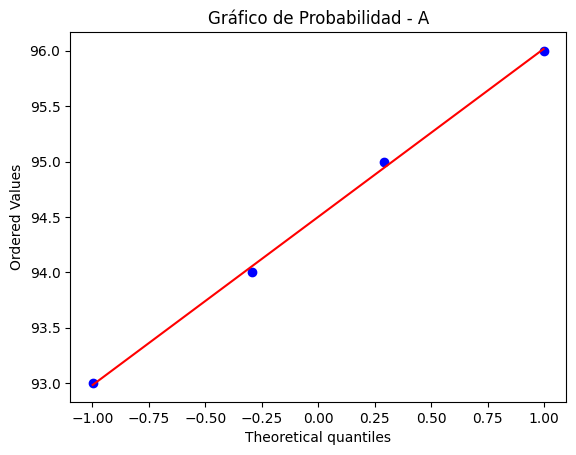

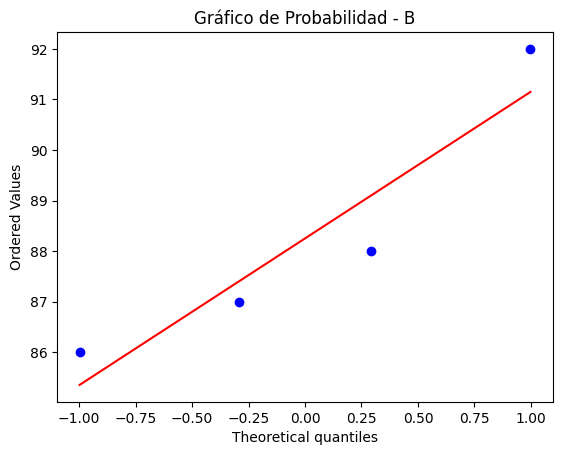

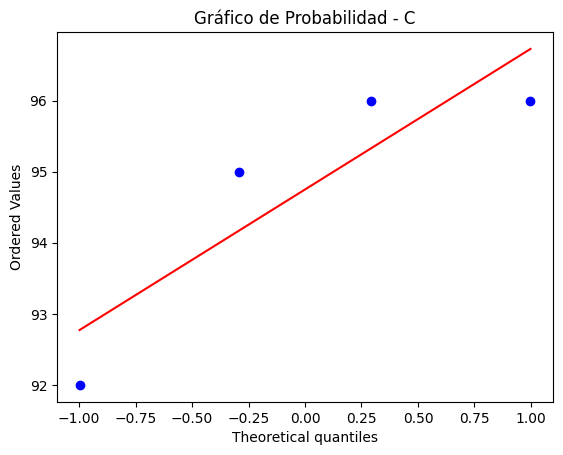

In [50]:
unique_Proveedor = DCA['Proveedor'].unique()
for Proveedor in unique_Proveedor:
    stats.probplot(DCA[DCA['Proveedor'] == Proveedor]['Pureza_2'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+Proveedor)
    plt.show()

In [51]:
Pureza_2 =modelDCA.resid
Pureza_2
Pureza_2.describe()

count    1.200000e+01
mean    -4.736952e-15
std      1.821588e+00
min     -2.750000e+00
25%     -1.312500e+00
50%      0.000000e+00
75%      1.250000e+00
max      3.750000e+00
dtype: float64

In [52]:
Pureza_2

0    -0.50
1     0.50
2    -1.50
3     1.50
4    -0.25
5     3.75
6    -2.25
7    -1.25
8     0.25
9     1.25
10    1.25
11   -2.75
dtype: float64

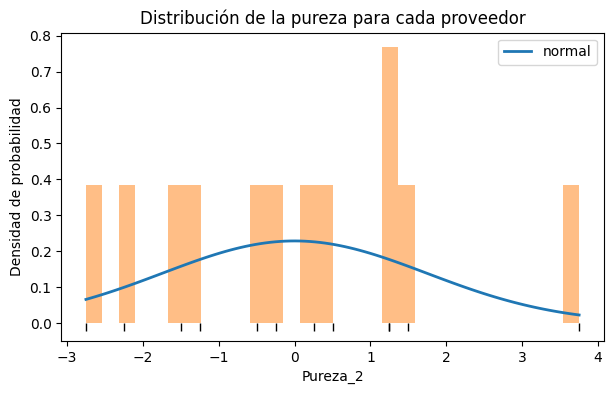

In [57]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(Pureza_2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Pureza_2), max(Pureza_2), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=Pureza_2, density=True, bins=30,  alpha=0.5)
ax.plot(Pureza_2, np.full_like(Pureza_2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de la pureza para cada proveedor')
ax.set_xlabel('Pureza_2')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

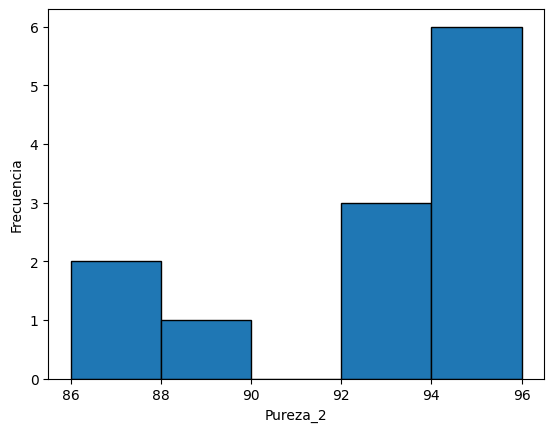

In [58]:
# **Histograma de Residuos**
plt.hist(DCA['Pureza_2'], bins='auto', histtype='bar', ec='k')

plt.xlabel("Pureza_2")
plt.ylabel('Frecuencia')
plt.show()

# **Histograma de Residuos**

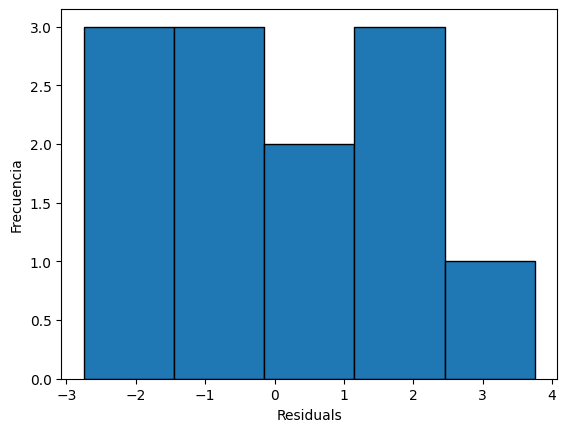

In [59]:
# **Histograma de Residuos**
plt.hist(modelDCA.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals")
plt.ylabel('Frecuencia')
plt.show()

# **Gráfico Q-Q**

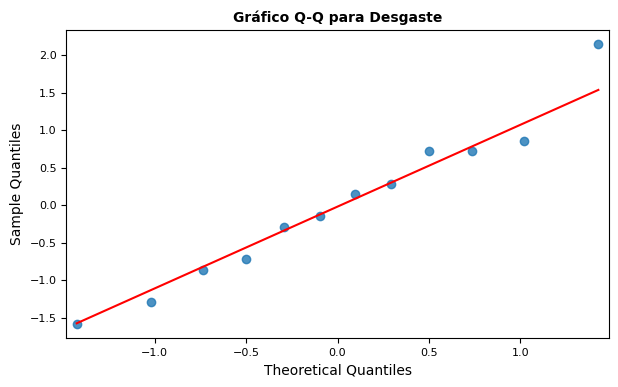

In [61]:
# **Gráfico Q-Q**
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    Pureza_2,
    fit   = True,
    line  = 'q',
    alpha = 0.8,
    lw    = 5,
    ax    = ax
)
ax.set_title('Gráfico Q-Q para Desgaste', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 8)

# **q. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [62]:
# q. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(DCA['Pureza_2'][DCA['Proveedor'] == 'A'],
             DCA['Pureza_2'][DCA['Proveedor'] == 'B'],
             DCA['Pureza_2'][DCA['Proveedor'] == 'C'],)

LeveneResult(statistic=0.2837837837837837, pvalue=0.7594240938617943)

# **2.0. Diseños en Bloques Completos al Azar - DBCA**

### **2.1 Problema de Aplicación.** _Se evalúa la eficacia de sulfato ferroso a 4 diferentes concentraciones $2$, $2.5$, $3$, y $4$ $mg/kg/día$ para combatir la anemia en personas con desnutrición. Dada la variabilidad de pesos y sexos, se decidió agrupar en bloque de personas por pesos lo más semejantes posibles. Se les dio el tratamiento durante 4 meses y se procedió a determinar su volumen sanguíneo dando los siguientes resultados:_

|Pesos\Tratamientos|T1 |T2| T3| T4| Total ($Y_{.j}$)|
|:--:|:--:|:--:|:--:|:--:|:--:|
|I |4.1| 6.5| 4.1| 4.9| 19.6|
|II |4.1| 5.3| 4.0| 6.2| 19.6|
|III |6.5| 6.9| 4.5| 4.8| 22.7|
|IV |4.3| 6.8| 4.3| 4.2| 19.6|
|V |6.0| 6.5| 4.1| 6.9| 23.5|
|Total Tratamiento ($Y_i.$)| 25| 32| 21| 27| 105|

- **Las hipótesis a probar: Para los tratamientos**
$$H_{01}: \mu_{T_1}=\mu_{T_2}=\mu_{T_3}=\mu_{T_4}$$ $$Vs$$ $$H_{a1}: \mu_{T_i}\neq\mu_{T_j}$$ _Al menos un tratamiento es diferente_

- **Las hipótesis a probar: Para los Bloques**
$$H_{02}: \mu_{B_1}=\mu_{B_2}=\mu_{B_3}=\mu_{B_4}=\mu_{B_4}$$ $$Vs$$ $$H_{a2}: \mu_{B_i}\neq\mu_{B_j}$$  _Al menos un bloque (pesos) es
diferente_

# **2.2 El DataFrame de los datos**

In [ ]:
# **2.2 El DataFrame de los datos**
Pesos = (['B1']*4+['B2']*4+['B3']*4+['B4']*4+['B5']*4)*1
S_Ferroso = (['T1']*1+['T2']*1+['T3']*1+['T4']*1)*5
V_Sanguineo =[4.1, 6.5, 4.1, 4.9,  4.1, 5.3, 4.0, 6.2,  6.5, 6.9, 4.5, 4.8, 4.3, 6.8, 4.3, 4.2,  6.0, 6.5, 4.1, 6.9]
dic_DBCA ={'Pesos': Pesos,'S_Ferroso': S_Ferroso, 'V_Sanguineo':V_Sanguineo}

DBCA  = pd.DataFrame(dic_DBCA)
DBCA

,Pesos,S_Ferroso,V_Sanguineo
0,B1,T1,4.1
1,B1,T2,6.5
2,B1,T3,4.1
3,B1,T4,4.9
4,B2,T1,4.1
5,B2,T2,5.3
6,B2,T3,4.0
7,B2,T4,6.2
8,B3,T1,6.5
9,B3,T2,6.9


# **2.3. Analisis descriptivo de la variable**

In [ ]:
# **2.3. Analisis descriptivo de la variable**
DBCA.describe()


,V_Sanguineo
count,20.000000
mean,5.250000
std,1.139021
min,4.000000
25%,4.175000
50%,4.850000
75%,6.500000
max,6.900000


# **2.4 Acediendo a algunos atributos del DataFrame**

In [ ]:
# **a Acediendo al atributo columns**
DBCA.columns

Index(['Pesos', 'S_Ferroso', 'V_Sanguineo'], dtype='object')

In [ ]:
# **b Accediendo al atributo tipo de datos de cada columna**
DBCA.dtypes

Pesos           object
S_Ferroso       object
V_Sanguineo    float64
dtype: object

In [ ]:
#**c. Contar las observaciones**
DBCA["Pesos"].value_counts()

B1    4
B2    4
B3    4
B4    4
B5    4
Name: Pesos, dtype: int64

In [ ]:
#**d. Contar las observaciones**
DBCA["S_Ferroso"].value_counts()

T1    5
T2    5
T3    5
T4    5
Name: S_Ferroso, dtype: int64

In [ ]:
#**e. Contar las observaciones**
DBCA["V_Sanguineo"].value_counts()

4.1    4
6.5    3
6.9    2
4.3    2
4.9    1
5.3    1
4.0    1
6.2    1
4.5    1
4.8    1
6.8    1
4.2    1
6.0    1
Name: V_Sanguineo, dtype: int64

In [ ]:
DBCA[["Pesos","V_Sanguineo"]].describe()

,V_Sanguineo
count,20.000000
mean,5.250000
std,1.139021
min,4.000000
25%,4.175000
50%,4.850000
75%,6.500000
max,6.900000


In [ ]:
DBCA[["Pesos",'V_Sanguineo']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Pesos,B1,B1,B1,B1,B2,B2,B2,B2,B3,B3,B3,B3,B4,B4,B4,B4,B5,B5,B5,B5
V_Sanguineo,4.1,6.5,4.1,4.9,4.1,5.3,4.0,6.2,6.5,6.9,4.5,4.8,4.3,6.8,4.3,4.2,6.0,6.5,4.1,6.9


# **2.5. BoxPlot para DBCA : V_Sanguineo vs S_Ferroso**

<Axes: title={'center': 'V_Sanguineo vs S_Ferroso'}, xlabel='S_Ferroso', ylabel='V_Sanguineo'>

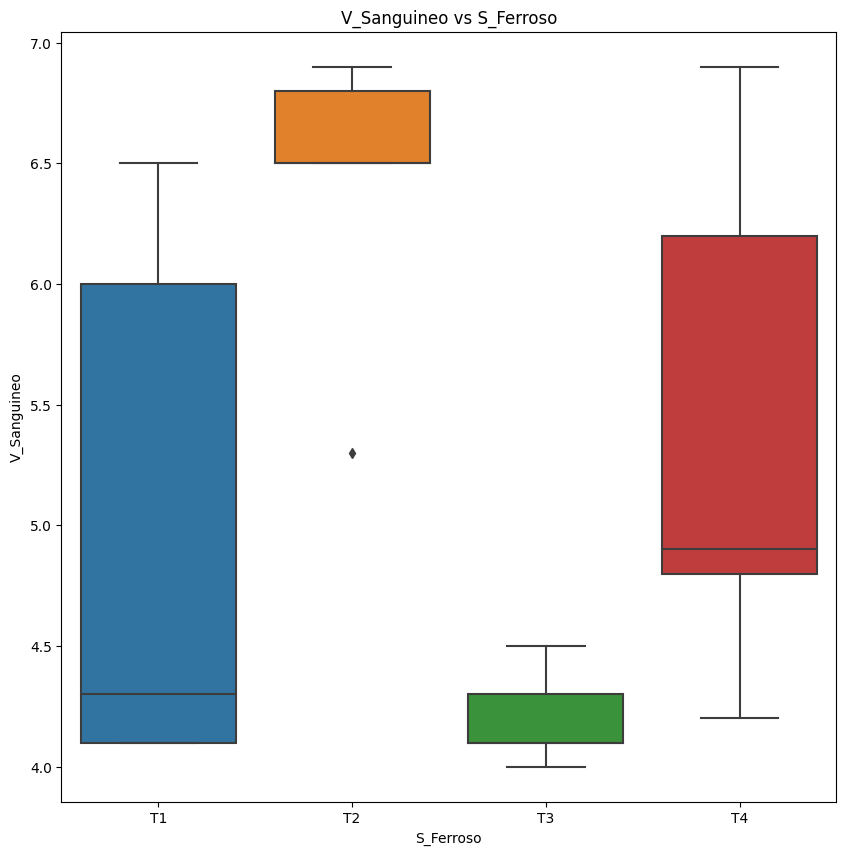

In [ ]:
# **2.5. BoxPlot para DBCA: V_Sanguineo vs S_Ferroso**
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('V_Sanguineo vs S_Ferroso')
sns.boxplot(x="S_Ferroso", y='V_Sanguineo',data=DBCA,ax=ax)


# **2.6. BoxPlot para DBCA: V_Sanguineo vs Pesos**

<Axes: title={'center': 'V_Sanguineo vs Pesos'}, xlabel='Pesos', ylabel='V_Sanguineo'>

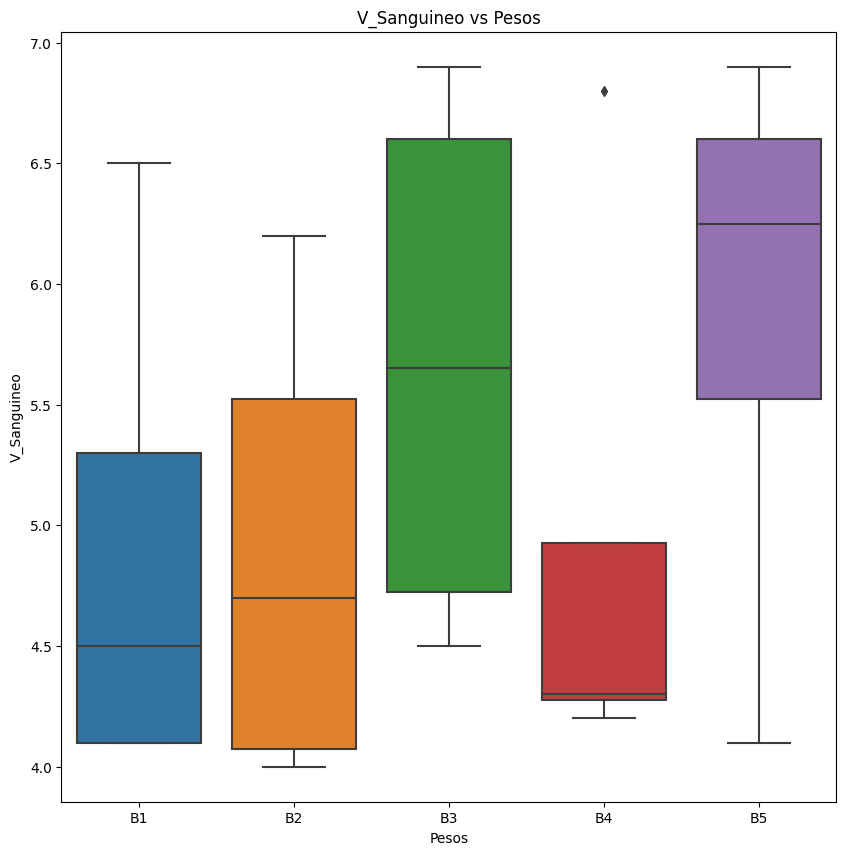

In [ ]:
# **2.6. BoxPlot para DBCA: V_Sanguineo vs Pesos**
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('V_Sanguineo vs Pesos')
sns.boxplot(x="Pesos", y='V_Sanguineo',data=DBCA,ax=ax)


# **2.7 Diagrama Bivariado no es sposible dado que no hay replicas**

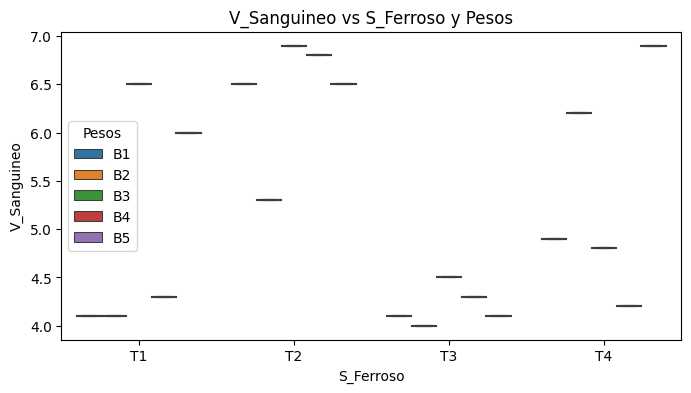

In [ ]:
# **2.7 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('V_Sanguineo vs S_Ferroso y Pesos')
sns.boxplot(x="S_Ferroso", y="V_Sanguineo", hue='Pesos', data=DBCA, ax=ax);

# **2.8 Análisis de Varianza Tipo I**

In [ ]:
# **2.8 Análisis de Varianza Tipo I**
modeloDBCA = ols("V_Sanguineo ~ S_Ferroso + Pesos", data = DBCA).fit()
anova_result2 = sm.stats.anova_lm(modeloDBCA, typ=2)
print (anova_result2)

           sum_sq    df         F    PR(>F)
S_Ferroso  12.550   3.0  6.015578  0.009644
Pesos       3.755   4.0  1.349910  0.307973
Residual    8.345  12.0       NaN       NaN


In [ ]:
anova_result2.T

,S_Ferroso,Pesos,Residual
sum_sq,12.550000,3.755000,8.345
df,3.000000,4.000000,12.000
F,6.015578,1.349910,NaN
PR(>F),0.009644,0.307973,NaN


In [ ]:
print(modeloDBCA.summary())

                            OLS Regression Results                            
Dep. Variable:            V_Sanguineo   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3.349
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0321
Time:                        22:58:26   Log-Likelihood:                -19.638
No. Observations:                  20   AIC:                             55.28
Df Residuals:                      12   BIC:                             63.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6500      0.527     

# **2.9 Análisis de Varianza Tipo II**

In [ ]:
# **2.9 Análisis de Varianza Tipo II**
modeloDBCA2 = smf.ols("V_Sanguineo ~ S_Ferroso + Pesos", data = DBCA).fit()
print(modeloDBCA2.summary())

                            OLS Regression Results                            
Dep. Variable:            V_Sanguineo   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3.349
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0321
Time:                        22:58:26   Log-Likelihood:                -19.638
No. Observations:                  20   AIC:                             55.28
Df Residuals:                      12   BIC:                             63.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6500      0.527     

In [ ]:
anova_result3 = sm.stats.anova_lm(modeloDBCA2, typ=2)
anova_result3.T

,S_Ferroso,Pesos,Residual
sum_sq,12.550000,3.755000,8.345
df,3.000000,4.000000,12.000
F,6.015578,1.349910,NaN
PR(>F),0.009644,0.307973,NaN


In [ ]:
# **2.9 Análisis de Varianza Tipo II**
modeloDBCA2 = smf.ols("V_Sanguineo ~ S_Ferroso-1 + Pesos", data = DBCA).fit()
print(modeloDBCA2.summary())

                            OLS Regression Results                            
Dep. Variable:            V_Sanguineo   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3.349
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0321
Time:                        22:58:26   Log-Likelihood:                -19.638
No. Observations:                  20   AIC:                             55.28
Df Residuals:                      12   BIC:                             63.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
S_Ferroso[T1]     4.6500      0.527      8.817

# **2.10 Comparaciones Múltiples:S_Ferroso**

group1,group2,meandiff,p-adj,lower,upper,reject
T1,T2,1.4,0.0903,-0.1736,2.9736,False
T1,T3,-0.8,0.4858,-2.3736,0.7736,False
T1,T4,0.4,0.8848,-1.1736,1.9736,False
T2,T3,-2.2,0.0051,-3.7736,-0.6264,True
T2,T4,-1.0,0.3011,-2.5736,0.5736,False
T3,T4,1.2,0.1705,-0.3736,2.7736,False


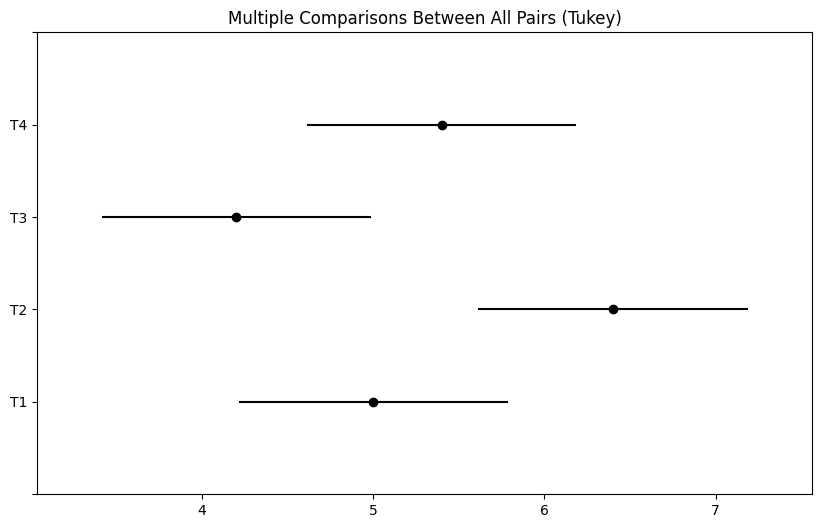

In [ ]:

# **2.10 Comparaciones Múltiples:S_Ferroso**
tukey = pairwise_tukeyhsd(endog=DBCA["V_Sanguineo"],     # Data
                          groups=DBCA["S_Ferroso"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **2.11 Comparaciones Múltiples:Pesos**

group1,group2,meandiff,p-adj,lower,upper,reject
B1,B2,-0.0,1.0,-2.5771,2.5771,False
B1,B3,0.775,0.8814,-1.8021,3.3521,False
B1,B4,-0.0,1.0,-2.5771,2.5771,False
B1,B5,0.975,0.7686,-1.6021,3.5521,False
B2,B3,0.775,0.8814,-1.8021,3.3521,False
B2,B4,0.0,1.0,-2.5771,2.5771,False
B2,B5,0.975,0.7686,-1.6021,3.5521,False
B3,B4,-0.775,0.8814,-3.3521,1.8021,False
B3,B5,0.2,0.9992,-2.3771,2.7771,False
B4,B5,0.975,0.7686,-1.6021,3.5521,False


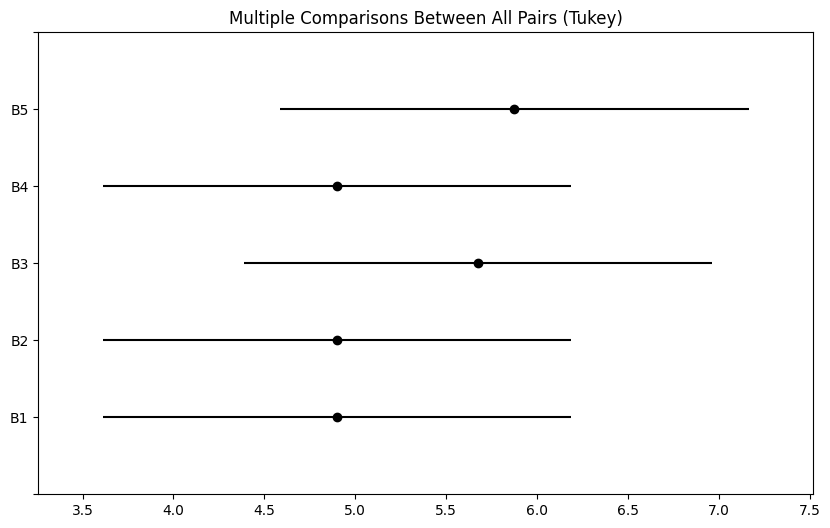

In [ ]:

# **2.11 Comparaciones Múltiples:Pesos**
tukey = pairwise_tukeyhsd(endog=DBCA["V_Sanguineo"],     # Data
                          groups=DBCA["Pesos"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **2.12 Supuesto del Modelo: Normalidad Prueba de  Shapiro Wilks**

In [ ]:

# **3.12 Supuesto del Modelo: Normalidad Prueba de  Shapiro Wilks**
w, pvalue = stats.shapiro(modeloDBCA.resid)
print(w, pvalue)

0.955288290977478 0.4545067846775055


# **2.13  Supuesto del Modelo: Normalidad: Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

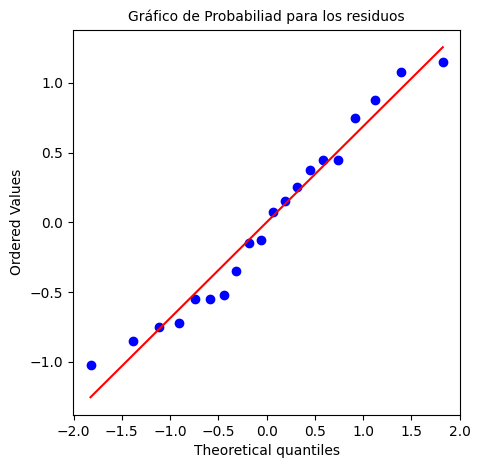

In [ ]:
# **2.13  Supuesto del Modelo: Normalidad: Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDBCA.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

# **2.14 Residuos del Modelo**

In [ ]:
# **2.14 Residuos del Modelo**
modeloDBCA.resid.describe()

count    2.000000e+01
mean     6.217249e-16
std      6.627296e-01
min     -1.025000e+00
25%     -5.500000e-01
50%     -2.500000e-02
75%      4.500000e-01
max      1.150000e+00
dtype: float64

# **2.15 Histograma de Residuos**

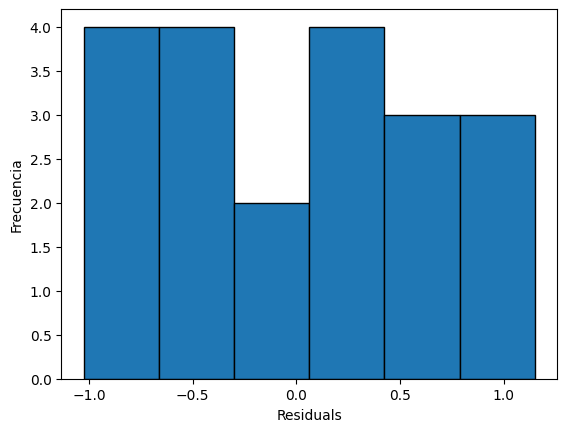

In [ ]:

# **2.15 Histograma de Residuos**
plt.hist(modeloDBCA.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals")
plt.ylabel('Frecuencia')
plt.show()


# **2.16 Histograma + curva normal teórica**

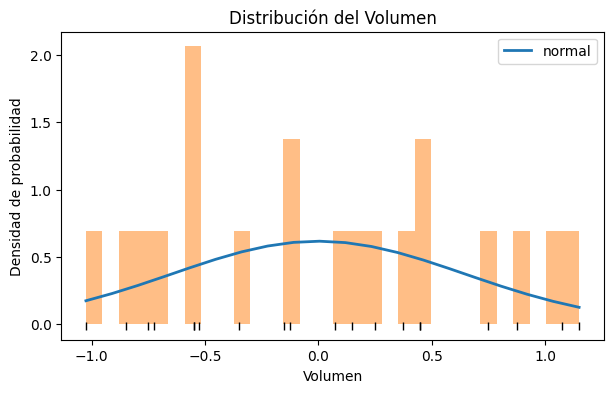

In [ ]:
# **2.16 Histograma + curva normal teórica**
# ==============================================================================
Volumen = modeloDBCA.resid
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(Volumen)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Volumen), max(Volumen), num=20)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=Volumen, density=True, bins=30,  alpha=0.5)
ax.plot(Volumen, np.full_like(Volumen, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Volumen')
ax.set_xlabel('Volumen')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

# **2.17 Gráfico Q-Q**

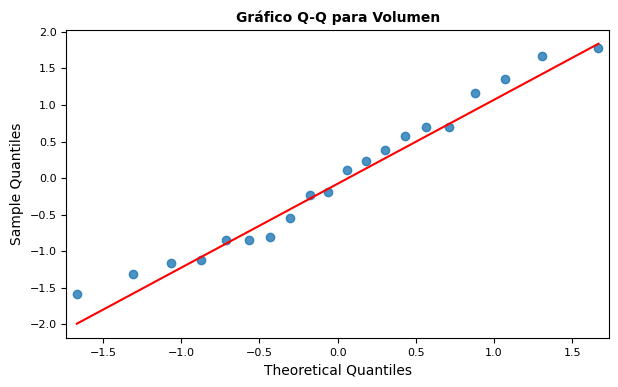

In [ ]:
# **2.17 Gráfico Q-Q**
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    Volumen,
    fit   = True,
    line  = 'q',
    alpha = 0.8,
    lw    = 5,
    ax    = ax
)
ax.set_title('Gráfico Q-Q para Volumen', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 8)

In [ ]:
# 2.18. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T1'],
             DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T2'],
             DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T3'],
             DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T4'])

LeveneResult(statistic=1.2169576059850375, pvalue=0.33572362617286766)